<a href="https://colab.research.google.com/github/hikkaaaa/machine-learning/blob/main/support_vector_machines_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

Building **Support Vector Machine** for **classification** using **scikit-learn** and the **Radial Basis Function (RBF) Kernel**. Our training data set contains continuous and categorical data from the UCI Machine Learning Repository to predict whether ot not a person will default on their credit card

**Support Vector Machines** are one of the best machine learning methods when getting the correct answer is a higher priority then understanding why you get the correct answer. They work really well with relatively small datasets and they tend to work well "out of the box". In otder words, they do not require much optimization

## The plan

* Importing Data from a File
* Missing Data

       - Identifying Missing Data
       - Dealing with Missing Data
* Downsampling Data
* Formatting the Data for Support Vector Machines

       - Splitting data into Dependent and Independent Variables
       - One-Hot Encoding
       - Centering and Scaling the Data
* Building a Preliminary Support Vector Machines
* Optimizing Parameters with Cross Validation

       - Using Cross Validation to find the best Values for Gamma and Regularization
* Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine


**NOTE:**

This tutorial assumes that you are familiar with Support Vector Machines (SVM)/ Radial Basis Funcion (RBF)/ Regularization, Cross Validation, and Confusion Matrices

# Import the Modules

Python 3

Pandas >= 0.25.1

Numpy >= 1.17.2

Sklearn >= 0.22.1

In [60]:
import pandas as pd #used to load and manipulate data and for One-Hot Enocding
import numpy as np #data manipluation
import matplotlib.pyplot as plt #drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample #downsampling
from sklearn.model_selection import train_test_split #split data into training an dtesting
from sklearn.preprocessing import scale #scale and center data
from sklearn.preprocessing import OneHotEncoder #to one hot encode the categorical data
from sklearn.compose import ColumnTransformer #One-Hot Encoding method
from sklearn.svm import SVC #this will make a support vector machine for classification
from sklearn.model_selection  import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix #creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay #draws the confusion matrix
from sklearn.decomposition import PCA #perform PCA to plot the data

# Import the Data

We are using UCI Machine Learning Repository. We are going to use Credit Card Default dataset. This dataset will allow us to predict if someone will default on their credit card payments based on their sex, age, and a variety of other metrics.

In [61]:
df = pd.read_excel("default_of_credit_card_clients.xls", header=1)
df.to_csv("default_of_credit_card_clients.csv", index=False)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The columns of the dataset are:

**ID**, The ID number assigned to each customer

**LIMIT_BAL**, Credit limit

**SEX**, Gender

**Education**, Level of education

**Marriage**, Marital status

**AGE**, Age

**PAY_**, When the last 6 billd were payed

**BILL_AMT**, What the last 6 bills were

**PAY_AMT**, How much the last payments were

**default payment next month**

In [62]:
df.rename({'default payment next month' : 'default'}, axis = 'columns', inplace=True) #chaning the 'default payment next month' to simply 'default'
df.drop('ID', axis=1, inplace=True) #droppping ID cus we dont need it
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Missing Data Part 1: Identifying Missing Data

In [63]:
df.dtypes

,0
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64


According to the Credit Card Default webpage:

* **LIMIT_BAL**, The amount of available credit Integer
* **SEX**, Category
     
     - 1 = male
     - 2 = female
* **EDUCATION**, Category
     
     - 1 = graduate school
     - 2 = university
     - 3 = high school
     - 4 = others
* **MARRIAGE**, Category
     
     - 1 = Married
     - 2 = Single
     - 3 = Other  
* **AGE**, Integer
* **PAY_**, When the last 6 bills were payed Category
     - -1 = Paid on time
     - 1 = Payment delayed by 1 month
     - 2 = Payment delayed by 2 months
     - ...
     - 8 = Payment delayed by 8 months
     - 9 = Payment delayed by 9 or more months
* **BILL_AMT**, What the last 6 bills were Integer
* **PAY_AMT**, How much the last payments were Integer
* **DEFAULT**, Whether or not a person defaults on the next payment Category
     - 0 = Did not default
     - 1 = Defaulted


Now lets make sure that some columns contain only the values that they should contain

In [64]:
df['SEX'].unique()

array([2, 1])

In [65]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

So, Education conatins also uknnown 0, 5, and 6

In [66]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

Marraige contains unknown 0

In [67]:
df['default'].unique()

array([1, 0])

# Missing data Part 2: Dealing With Missing Data

In [68]:
len(df.loc[(df['EDUCATION'] == 0) |(df['MARRIAGE'] == 0)])

68

In [69]:
len(df)

30000

We have 68 missing values out of 30000 values, which means that it would be too costly for us to remove those

In [70]:
df_no_missing = df.loc[(df['EDUCATION'] != 0 & (df['MARRIAGE'] != 0))]

In [71]:
len(df_no_missing)

29986

# Downsample the Data

**Support Vector Machines** are great with small datasets, but not awesome with large ones, and this dataset, while not huge, is big enough to take a long time to optimize with **Cross Validation**. So we'll downsample both categories, customers who did and did not default, to 1000 each.

To make sure we get 1000 of each category, we start by splitting the data into two dataframes, one for people that did not default and one for people that did

In [72]:
df_no_default = df_no_missing[df_no_missing['default'] == 0]
df_default = df_no_missing[df_no_missing['default'] == 1]

Now, downsample the dataset that did not default

In [73]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples = 1000, random_state = 42)
len(df_no_default_downsampled)

1000

Downsample the one that did default

In [74]:
df_default_downsample = resample(df_default, replace=False, n_samples = 1000, random_state=42)
len(df_default_downsample)

1000

Now, let's merge the two downsampled datasets into a single dataframe

In [75]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsample])
len(df_downsample)

2000

# Format Data Part 1: Split the Data into Dependent and Independent Variables

Starting top format the data for making a **Support Vector Machine**

The first step is to split the data into two parts:

1) The columns of data that we will use to make classifications (features) (noted as X)

2) The column of data that we want to predict (label) (noted as y)

In this case, we want to predict **default** (whether or not someone defaulted on a payment)

In [76]:
X = df_downsample.drop('default', axis = 1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
15668,410000,1,1,2,27,0,-1,-1,0,-1,...,15678,40512,17884,34251,16090,16076,40203,17974,34518,369
14463,500000,1,1,2,35,-1,0,0,0,0,...,20424,7840,846,790,4769,19629,157,0,790,860
19793,60000,2,3,1,42,0,0,2,2,2,...,18486,19077,18487,18429,5000,0,3000,2,1000,1000
18456,130000,2,2,2,27,-1,-1,-1,-1,0,...,191,2898,4728,5149,0,382,2898,1900,500,500
14377,310000,2,3,1,31,0,0,0,0,0,...,140681,104855,77242,74165,9000,6005,5017,3000,4000,3000


In [77]:
y = df_downsample['default'].copy()
y.head()

,default
15668,0
14463,0
19793,0
18456,0
14377,0



Using copy() ensures that the original data of df_downsample is not modified when we modify X or y.

# Format The Data Part 2: One-Hot Encoding

We need to take a closer look at the variables in X

SEX, EDUCATION, MARRIAGE, and PAY_ are supposed to be categorical and need to be modified. This is because, while scikit-learn Support Vector Machines natively support continuous data, like LIMIT_BAL and AGE, they do not natively support categorical data, like MARRIAGE, which contains 3 different categories. Thus, in order to use categorical data with scikit-learn SVM, we have to use trich that converts a column of categorical data into multiple columns of binary values. This trick is called On-Hot Encoding

In [78]:
X.iloc[1]

,14463
LIMIT_BAL,500000
SEX,1
EDUCATION,1
MARRIAGE,2
AGE,35
PAY_0,-1
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [79]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Keeps the other columns (numerical)
)

X_encoded = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()
X_encoded_df = pd.DataFrame(
    X_encoded,
    columns=feature_names,
    index=X.index
)

X_encoded_df.head()

,onehot__SEX_1,onehot__SEX_2,onehot__EDUCATION_1,onehot__EDUCATION_2,onehot__EDUCATION_3,onehot__EDUCATION_4,onehot__EDUCATION_5,onehot__EDUCATION_6,onehot__MARRIAGE_0,onehot__MARRIAGE_1,...,remainder__BILL_AMT3,remainder__BILL_AMT4,remainder__BILL_AMT5,remainder__BILL_AMT6,remainder__PAY_AMT1,remainder__PAY_AMT2,remainder__PAY_AMT3,remainder__PAY_AMT4,remainder__PAY_AMT5,remainder__PAY_AMT6
15668,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15678.0,40512.0,17884.0,34251.0,16090.0,16076.0,40203.0,17974.0,34518.0,369.0
14463,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20424.0,7840.0,846.0,790.0,4769.0,19629.0,157.0,0.0,790.0,860.0
19793,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,18486.0,19077.0,18487.0,18429.0,5000.0,0.0,3000.0,2.0,1000.0,1000.0
18456,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,191.0,2898.0,4728.0,5149.0,0.0,382.0,2898.0,1900.0,500.0,500.0
14377,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,140681.0,104855.0,77242.0,74165.0,9000.0,6005.0,5017.0,3000.0,4000.0,3000.0


# Format the Data Part 3: centering and Scaling

The Radial Basis Function (RBF) that we are using with out Support Vector Machine assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So we need to do this to both the training and testing datasets.

**NOTE:** We split the data into training and testing datasets and then scale them sepeartely to avoid **Data Leakage**. **Data Leakage** occurs when information about the training dataset currupts or influences the testing dataset.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Build a Preliminary Support Vector Machin (SVM)

In [81]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

Ok, we've built a Support Vector Machine for classification. Let's see how it performs on the **Testing Dataset** and draw a **Confusion Matrix**

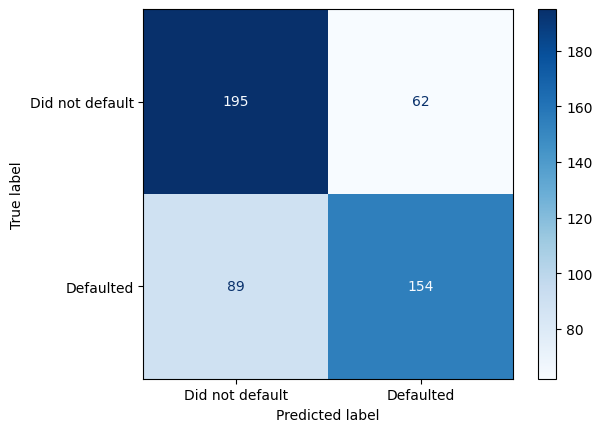

In [82]:
ConfusionMatrixDisplay.from_estimator(
    clf_svm,
    X_test_scaled,
    y_test,
    display_labels=['Did not default', 'Defaulted'],
    cmap=plt.cm.Blues
)

plt.show()

In [83]:
(y_test == 1).sum()

np.int64(243)

154 out of 243 that was predicted is ~63%

In [84]:
(y_test == 0).sum()

np.int64(257)

195 out of 257 that was predicted is ~76%

As we can see, the predictions are not that good, so we have to use Cross Validation to enhace the preformance

# Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a Support Vector Machine is all about finding the best value for **gamma**, and, potentially, the regularization parameter, **C**. So let's see if we can find better parameters values using cross validation in hope that we can improve the accuracy with the **Testing Dataset**

Since we have two parameters to optimize, we will use `GridsearchCV()`. We specify a bunch of potential values for gamma, and C, and GridsearchCV() tests all possible combinations of the parameters for us

In [85]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 0
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

And we see that the ideal value for C is 100, and the ideal value for gamma is 0.001

# Building, Evaluating, Drawing and Interpreting the Final support Vector Machine

Now that we have the ideal values for `C` and `gamma`, we can build the final **Support Vector Machines**

In [86]:
clf_svm = SVC(random_state = 42, C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

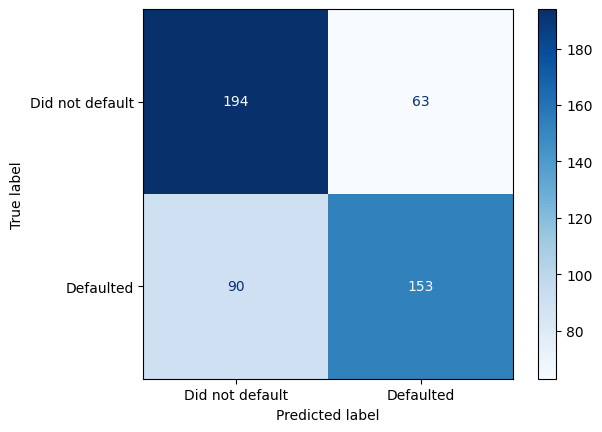

In [87]:
ConfusionMatrixDisplay.from_estimator(
    clf_svm,
    X_test_scaled,
    y_test,
    display_labels=['Did not default', 'Defaulted'],
    cmap=plt.cm.Blues
)

plt.show()

okay weell actually it is better off without ioptimizing the parameters

The last thing we are going to do is draw a support vector machine decision boundary and discuss how to interpret it.

The first thing we need to do is count the number of columns in X:

In [88]:
len(df_downsample.columns)

24

In [90]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

So we see that there are 24 features, or columns, in X. This is a problem because it would require 24-dimensional graph, one simension per feature used to make predictions, to plot the data in its raw form. If we wanted to, we could just pick two features at random to use as x and y-axes on our graph, but instead, we will use **PCA (Principal Component Analysis)** to combine the 24 features into 2 orthogonal meta-features that we can use as azes for a graph.

However, before we shrink the graph, let's first determine how accurate the shrunken graph will be. If it's relatively accurate, than it makes sense to draw the 2-dimensional graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph by drawing something called a **scree plot**.

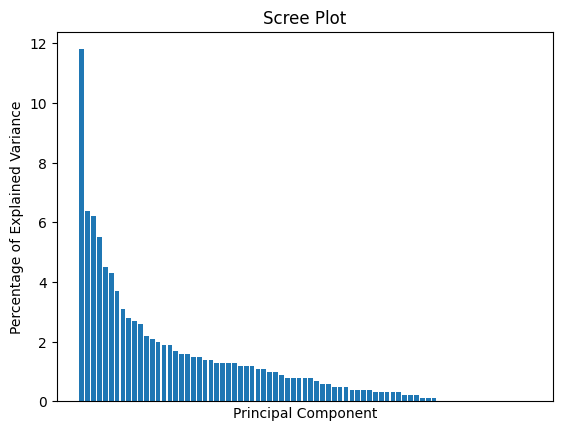

In [92]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means  that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much different from PC3 or PC4, which doesn't bode well for dimension reduction. Since we don't have a choice, let's go with it, but don't be surprised if the final graph looks funky

In [93]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))
param_grid = [
    {'C': [1, 10, 100, 1000],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 0
)

optimal_params.fit(pca_train_scaled, y_train)
optimal_params.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

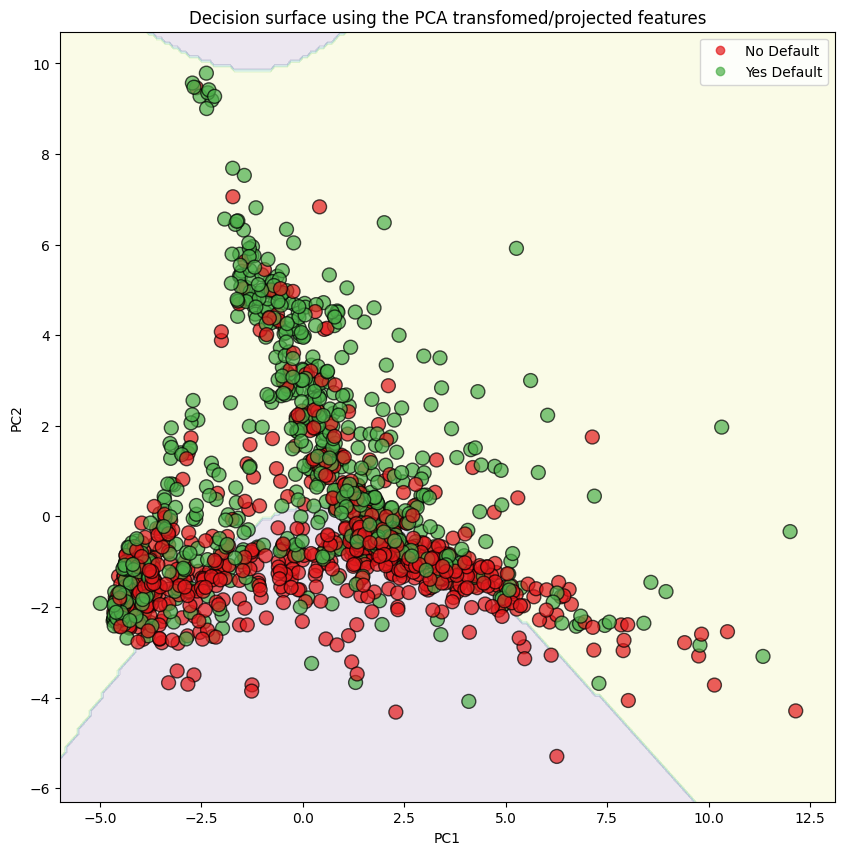

In [96]:
clf_svm = SVC(random_state = 42, C = 1000, gamma = 0.001)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1
y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1), np.arange(start=y_min, stop=y_max, step=0.1))

Z =clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (10, 10))

ax.contourf(xx, yy, Z, alpha = 0.1)

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(
    test_pc1_coords,
    test_pc2_coords,
    c = y_train,
    cmap = cmap,
    s = 100,
    edgecolor = 'k',
    alpha = 0.7)

legend = ax.legend(scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc = "upper right")

legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transfomed/projected features')
plt.show()

**The pink part of the graph** - area were all datapoints will be predicted to have not defaulted

**The yellow part of the graph** - area where all datapoints will be predicted to have defaulted. The dots are datapoints in the training dataset and are color coded by their known classifications: **red** is for those that did not default and **green** is for thoses that defulted